<a href="https://colab.research.google.com/github/onew11/study/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import cv2  #이미지 처리
import matplotlib.pyplot as plt #이미지 추합

import tensorflow_datasets as tfds
import tensorflow as tf



In [44]:
# 데이터 셋 가져오기, TRAIN_SET과 데이터 정보 가져오기
data_train, ds_info = tfds.load('cats_vs_dogs', split=[tfds.Split.TRAIN], with_info=True)
ds_info #데이터 수 : 23262

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

In [45]:
images = [one['image'].numpy() for one in data_train[0].take(30)]  #이미지 30개 불러오기, numpy형식으로 변환
len(images) #데이터 개수 확인

30

(-0.5, 335.5, 408.5, -0.5)

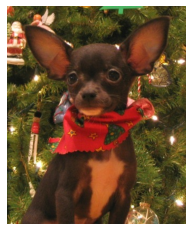

In [46]:
plt.imshow(images[1])   #이미지 확인 (0~30)
plt.axis('off')

In [71]:
#resnet 사용, 학습된 모델 불러오기
resnet50_pre=tf.keras.applications.resnet.ResNet50(weights='imagenet',input_shape=(224,224,3)) #imagenet : 학습된 인공지능의 가중치 가져오기
resnet50_pre.summary()  #모델 정보 확인

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [62]:
#ImageNet 데이터셋에 대한 top 매개변수 만큼의 최상위 항목을 반환
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [68]:
#이미지 예측
def pred_img(img):
  plt.imshow('off')
  plt.show()

  img_resized=cv2.resize(img,(224,224))  #이미지 사이즈 조정
  pred=resnet50_pre.predict(img_resized.reshape([1,224,224,3])) #배치로 사이즈 변환
  decode_pred=decode_predictions(pred)  #결과를 어떤 대상인지로 변환

 #결과 확인 (1~5위)
  for i, instance in enumerate(decoded_pred[0]):
    print('{}위: {} ({:.2f}%)'.format(i+1, instance[1], instance[2]*100))  #몇 %의 확률로 예측 했는지

TypeError: ignored

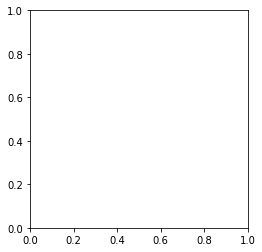

In [70]:
pred_img(images[0])   #실패...